# **Course: Data Science for Decision Support**
**Assignment 3** (Submission deadline 06.07.2022, 16:00), 

**Executor:** Eric Dietriche, Sesso Domtchoueng: 504999.

---
Your individual data for assignment 2:

| the second digit from the end of Matr.Nr. | Task2, Q4 | Task 3 Lime|
| ----------- | ----------- | ----------- |
| 9      |XGBoost        | 2,5      |







# Problem: **Regression** (Total score 50) 

# **`Task 1 ““Prediction with neural networks” (20 Scores)`**

1)	Do all preparation steps as in previous assignments to clean, scale and prepare the dataset
for the analysis. Use the best scaler from your previous assignments.

In [1]:

from google.colab import files
uploaded = files.upload()


Saving HousingData.csv to HousingData.csv


In [2]:
#add more cell if needed to each code cell
import pandas as pd
df = pd.read_csv("HousingData.csv")

In [3]:
df.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#use value_count() for count unique value in column
count=0
for column in df:
        count +=  len(df[column].value_counts(dropna=False))
print("number of Instance:",count)
print("number of variable:",len(df.columns))

number of Instance: 3026
number of variable: 14


In [5]:
#Write your code here 
Y = df['MEDV']
X = df.drop(['MEDV'],axis='columns')
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (506, 13)
Shape of Y: (506,)


In [6]:
#Write your code here 
#fill Nan Values with the mean values , if at least one value is nan-value. 
if (not (df.isnull().values.any())):
      print("There are no NAN values")
else:
  for column in df:
    if df[column].isnull().values.any(): 
              df[column] = df[column].fillna(df[column].mean())

In [7]:
from sklearn.preprocessing import MinMaxScaler
minMax_scaler = pd.DataFrame(
    MinMaxScaler().fit_transform(df),
    columns = df.columns
)
y  = df['MEDV']
X_minMax_scale = minMax_scaler.drop(['MEDV'],axis='columns')
X_minMax_scale

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.303130
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


*2) Construct a fully connected neural network using “keras” library. The network should
contain 1-2 hidden layers. Experiment with different number of neurons for each layer, try
several dropout layers between hidden layers. Try to achieve the performance near or better
than the best one of your previous methods. Present the performance results (predictions,
R2, MSE, MAE) for the testset with 3 best architectures as a table. Use repeated holdout crossvalidation, generating 5 random training sets and test sets with proportion according to
your individual variant in assignment 2*



In [ ]:
!pip install scikeras

In [10]:
import numpy as np
import pandas as pd
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error


In [16]:
#fit the keras model on the dataset
def create_model(inp_s):
  network = Sequential()
  #  2 hidden layers : the first has 12 nodes and the second 8 nodes  
  network.add(Dense(60, input_shape=(inp_s,), activation='relu'))
  network.add(Dropout(0.5))
  network.add(Dense(30, activation='relu'))
  network.add(Dropout(0.5))
  # Output Layer 
  network.add(Dense(1))
  network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','mae','mape'])
  return network


In [56]:
from sklearn.model_selection import train_test_split
models = []
for i in range(0,5):
     X_train, X_test, y_train, y_test = train_test_split(X_minMax_scale, y, test_size=0.1)
     model = KerasRegressor(model=create_model,inp_s=13, epochs=50, batch_size=12, verbose=0)
     model.fit(X_train,y_train)
     y_pred = model.predict(X_test)
     r2 = r2_score(y_test, y_pred)
     mse = mean_squared_error(y_test, y_pred)
     mae = mean_absolute_error(y_test, y_pred)
     models.append((y_pred,r2,mse,mae))

In [57]:
def getKey(item):
  return item[1]
modelSort = sorted(models, key=getKey,reverse=True)

In [58]:
list_pred = [modelSort[0][0],modelSort[1][0],modelSort[2][0]]
r2 = [modelSort[0][1],modelSort[1][1],modelSort[2][1]]
mse =[modelSort[0][2],modelSort[1][2],modelSort[2][2]]
mae= [modelSort[0][3],modelSort[1][3],modelSort[2][3]]
table =pd.DataFrame(list(zip(list_pred,r2,mse,mae)),columns=['Prediction (test set)','R2','MSE','MAE'])
table

,Prediction (test set),R2,MSE,MAE
0,"[28.360813, 11.769208, 13.428037, 26.783876, 3...",0.807234,21.210134,3.196769
1,"[20.651064, 12.394709, 16.261011, 11.479285, 3...",0.792715,22.616643,3.556515
2,"[10.796388, 12.662338, 12.891716, 40.07912, 15...",0.781284,20.939709,3.360583


# **`Task 2 “Evaluate the variable importance in your built deep neural network”  (20 Scores)`**

**1**)	Use “Drop column Importance” to calculate the variables importance of your build neural
networks (Use the tutorial at the end of the assignment). Present the results as a bar plot.

In [61]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
def drop_col_feat_imp(model, X_train, y_train,random_state = 30):
  model_clone = clone(model)
  model_clone.random_state = random_state 
  model_clone.fit(X_train,y_train)
  benschmark_score = model_clone.score(X_train,y_train)
  importances = []
  for col in X_train.columns:
      model_clone  = KerasRegressor(model=create_model,inp_s=12, epochs=30, batch_size=8, verbose=0)  
      model_clone.fit(X_train.drop(col,axis=1),y_train)
      drop_col_score = model_clone.score(X_train.drop(col,axis=1),y_train)
      importances.append(benschmark_score - drop_col_score)
  importances_df = pd.DataFrame(importances,columns=['importances'], index =X_train.columns)
  return importances_df

In [62]:
importances_df=drop_col_feat_imp(model, X_train, y_train,random_state = 30)

In [63]:
import plotly.express as px
fig = px.bar(importances_df, x='importances', y=importances_df.index)
fig.show()

*2) Use “Permutation Importance” method to calculate the variables importance of your build
neural networks. Present the results as a bar plot. Use from sklearn.inspection import
permutation_importance.*

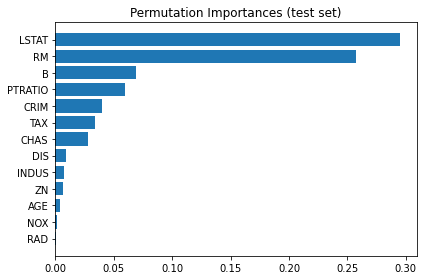

In [64]:
from sklearn.inspection import permutation_importance
import plotly.express as px
import matplotlib.pyplot as plt
result = permutation_importance(model, X_test, y_test)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.barh(X_test.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

3) Take linear regression results of interpretability, which correspond to model coefficients
from assignment 1. Compare the results of the considered explainability methods with
coefficient of linear regression.

In [65]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg = reg.fit(X_train,y_train)
reg.coef_

array([ -9.22618036,   4.61627568,  -1.59429899,   2.85796773,
        -8.38025158,  19.55932676,  -0.85050529, -17.42259965,
         6.74896973,  -6.04853765,  -8.51138582,   3.34487255,
       -17.72196009])

The coefficients of the regression model can be explained with the result of the explainability methodes (importances and permutation)

*4) Take one of the models from assignment 2 according to your individual variant (Random
Forest, XGBoost, CatBoost, LightGBM) and output its build-in variable importance built
with “Mean decrease in Impurity” method (use model.feature_importances_).
Compare the results with results of previously considered methods in steps 1-4. Make
conclusions.*

In [66]:
from xgboost import XGBRegressor
rf = XGBRegressor(max_depth=10, min_child_weight=3, n_estimators=50, objective='reg:squarederror', random_state=5)
rf.fit(X_train, y_train)
df_feacture_importances = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train.columns),  reverse=True)
importances = []
features = []
for value,feature in df_feacture_importances :
    importances.append(value)
    features.append(feature)
df2 = pd.DataFrame(list(zip(importances,features)),columns=['importances','features'])
fig = px.bar(df2, x='importances', y='features')
fig.show()

The Features RM and LSTAT are more important for explaining the Target values. it's also the case by the neural network keras

# **`Task 3:“Evaluate the variable importance in your built deep neural network locally for several predictions” (10 scores) `**

1) Use “LIME” method to calculate the variables importance of your build neural networks
locally for several instances of the dataset. Select the instances to predict according to your
individual variant. Present the results as a bar plot. Use
lime.lime_tabular.LimeTabularExplainer in mode=”regression”.



In [ ]:
!pip install lime

Prediction :  16.261011
Actual :      20.5
Intercept 23.953925058126124
Prediction_local [13.84809668]
Right: 16.261011
Prediction :  27.82549
Actual :      29.9
Intercept 18.353470689684773
Prediction_local [29.79691307]
Right: 27.82549


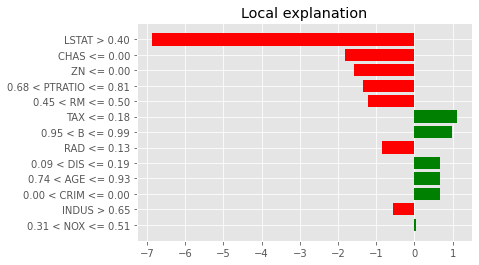

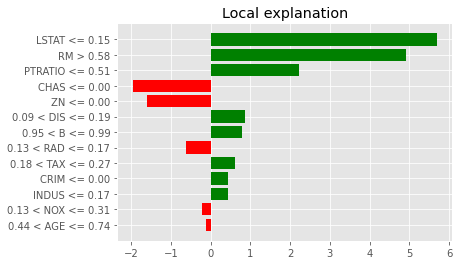

In [68]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['MEDV'], verbose=True, mode='regression')
for idx in [2,5]:
  explanation = explainer.explain_instance(X_test.iloc[idx], model.predict, num_features=13)
  with plt.style.context("ggplot"):
      explanation.as_pyplot_figure()

# **`Task 4: “Evaluate how independent variables influence the target variables construction Partial-Dependence Plots (PDP) ” (10 scores) `**

1) Construct a PDP for each of the independent variables in your dataset (Use from sklearn.inspection import PartialDependenceDisplay). 

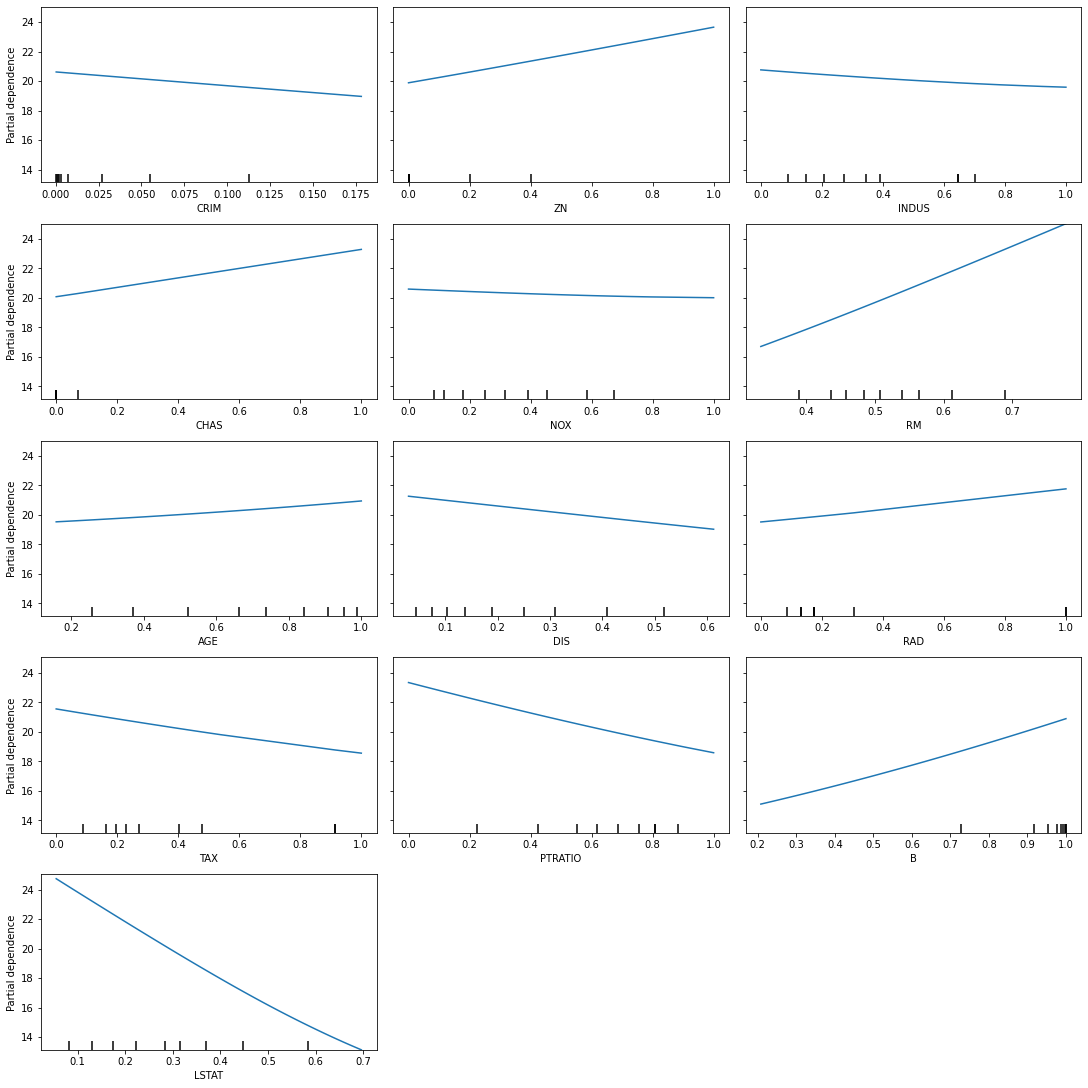

In [69]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15),constrained_layout=True)
ax.set_title("Neuronal network Keras")
PartialDependenceDisplay.from_estimator(model, X_minMax_scale,X_train.columns.values.tolist(),ax=ax)